## 1. **Why Kernels?**

* Linear SVM works only when data is *linearly separable*.
* But what if classes are arranged in a circle, spiral, or any nonlinear shape?
  → A straight hyperplane won’t cut it.

💡 Trick: Instead of working in the original feature space, **map data into a higher-dimensional space** where it becomes linearly separable.

But explicitly computing this mapping can be expensive (even infinite-dimensional!).

That’s where kernels come in.

---

## 2. **Kernel Trick**

A **kernel function** computes the inner product in some higher-dimensional space *without ever computing the mapping explicitly*.

Mathematically:

$$
K(x_i, x_j) = \phi(x_i)^T \phi(x_j)
$$

* $\phi(x)$ = mapping to higher-dim space
* $K(x_i, x_j)$ = kernel function (efficient shortcut)

This allows SVM to learn nonlinear boundaries **without heavy computation**.

---

## 3. **Common Kernels**

Here are the most popular ones:

### 🔹 (a) Linear Kernel

$$
K(x_i, x_j) = x_i^T x_j
$$

This formula defines the **linear kernel**. It simply computes the dot product between two input vectors $x_i$ and $x_j$. In the context of SVMs, using this kernel means no transformation is applied to the data—the classifier tries to find a straight-line (or hyperplane) boundary in the original feature space. This is equivalent to the standard linear SVM.

* No transformation, just the dot product.
* Same as linear SVM.
  ✅ Use when features are already linearly separable.

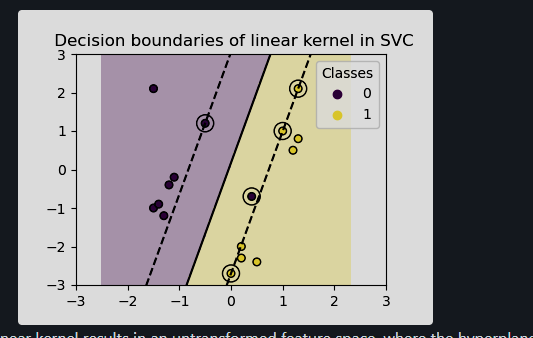


---

### 🔹 (b) Polynomial Kernel

$$
K(x_i, x_j) = (x_i^T x_j + c)^d
$$

* $x_i, x_j$: Input feature vectors.
* $x_i^T x_j$: Dot product between $x_i$ and $x_j$.
* $c$: A constant that trades off the influence of higher-order versus lower-order terms (controls flexibility).
* $d$: The degree of the polynomial (controls the complexity of the decision boundary).

* Expands features into polynomials of degree $d$.
* Example: in 2D, a quadratic kernel lets SVM draw circles, ellipses, etc.
  ✅ Useful when interactions between features matter.

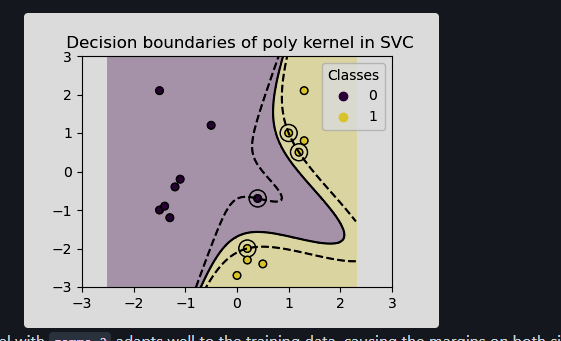
---

### 🔹 (c) Radial Basis Function (RBF) / Gaussian Kernel (Default)

$$
K(x_i, x_j) = \exp\left(-\frac{\|x_i - x_j\|^2}{2\sigma^2}\right)
$$

* $x_i, x_j$: Input feature vectors.
* $\|x_i - x_j\|^2$: Squared Euclidean distance between $x_i$ and $x_j$.
* $\sigma$: Controls the width of the Gaussian (how far the influence of a single training example reaches).
* $\exp$: Exponential function.

* Measures similarity based on distance.
* Points closer together have high kernel value.
* Creates very flexible, nonlinear boundaries.
  ✅ Most popular kernel when you don’t know the data shape.

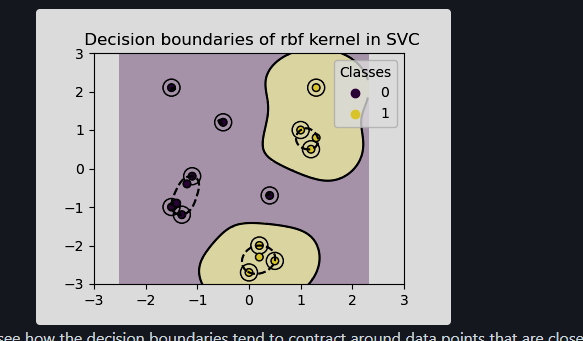

* K ~ 1 -- > High similarity
* K ~ 0 -- > Low similarity

---

### 🔹 (d) Sigmoid Kernel

$$
K(x_i, x_j) = \tanh(\alpha x_i^T x_j + c)
$$

* $x_i, x_j$: Input feature vectors.
* $x_i^T x_j$: Dot product between $x_i$ and $x_j$.
* $\alpha$: Slope parameter (controls the "steepness" of the sigmoid).
* $c$: Intercept parameter (shifts the function left/right).
* $\tanh$: Hyperbolic tangent function (squashes values between -1 and 1).

* Similar to neural networks’ activation.
* Less common, not always positive semi-definite.
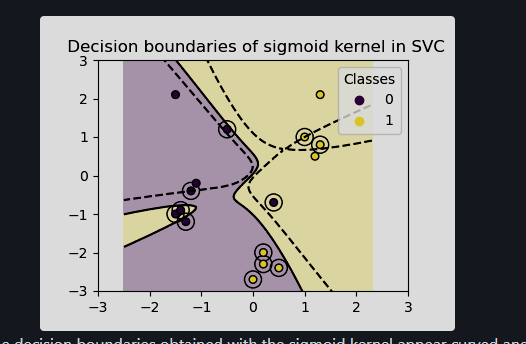

---

## 4. **How Kernels Affect Decision Boundary**

* Linear kernel → straight line.
* Polynomial kernel → curved surfaces (parabolas, circles, etc.).
* RBF kernel → very flexible, can carve complex shapes.

---

## 5. **Choosing the Right Kernel**

* **Linear kernel**: many features, but linearly separable.
* **Polynomial kernel**: medium complexity, feature interactions.
* **RBF kernel**: general-purpose, works well in most cases.
* **Sigmoid**: rarely used today (neural nets do it better).

---

## 6. **SVM with Kernel Decision Function**

Final classifier is:

$$
f(x) = \text{sign}\Big( \sum_i \alpha_i y_i K(x_i, x) + b \Big)
$$

**Where:**
- $x$: The input vector to classify.
- $x_i$: The $i$-th support vector from the training set.
- $\alpha_i$: Learned weight for the $i$-th support vector (from training).
- $y_i$: Label (+1 or -1) of the $i$-th support vector.
- $K(x_i, x)$: Kernel function measuring similarity between $x_i$ and $x$.
- $b$: Bias term (intercept).
- $\text{sign}(\cdot)$: Returns +1 or -1, indicating the predicted class.

So only support vectors + kernel function are needed at prediction time.

---

👉 In short: **Kernels let SVM "bend" the decision boundary by secretly lifting data into higher dimensions, but only doing math in the original space.**

